# LINEAR REGRESSION ASSIGNMET

## Step 1: Reading and Understanding the Data


In [1]:
#importing all required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
#Reading the Car Dataset and dropping the car_ID 
df=pd.read_csv('CarPrice_Assignment.csv')
df=df.drop(['car_ID'],axis=1)


In [3]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [6]:
#Checking the unique value of CarName
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
# Splitting the Car model and Company Name from CarName
df_car_name = df["CarName"].str.split(" ", n = 1, expand = True)

# Creating new column with Company_Name
df["Company_Name"]= df_car_name[0]

# Dropping original CarName
df=df.drop('CarName',axis=1)

In [8]:
# Unique company name after split
df.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# Correcting the Company Name
# volkswagen = vokswagen = vw
# Nissan = nissan
# mazda = maxda
# porsche = porcshce
# toyota = toyouta
df['Company_Name'] = df['Company_Name'].replace({'vokswagen': 'volkswagen', 'vw': 'volkswagen','nissan':'Nissan','maxda':'mazda','porcshce':'porsche', 'toyouta':'toyota'})


In [10]:
# Unique Company Name after correction
df.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Step 2: Visualising and Data Cleaning Preparation

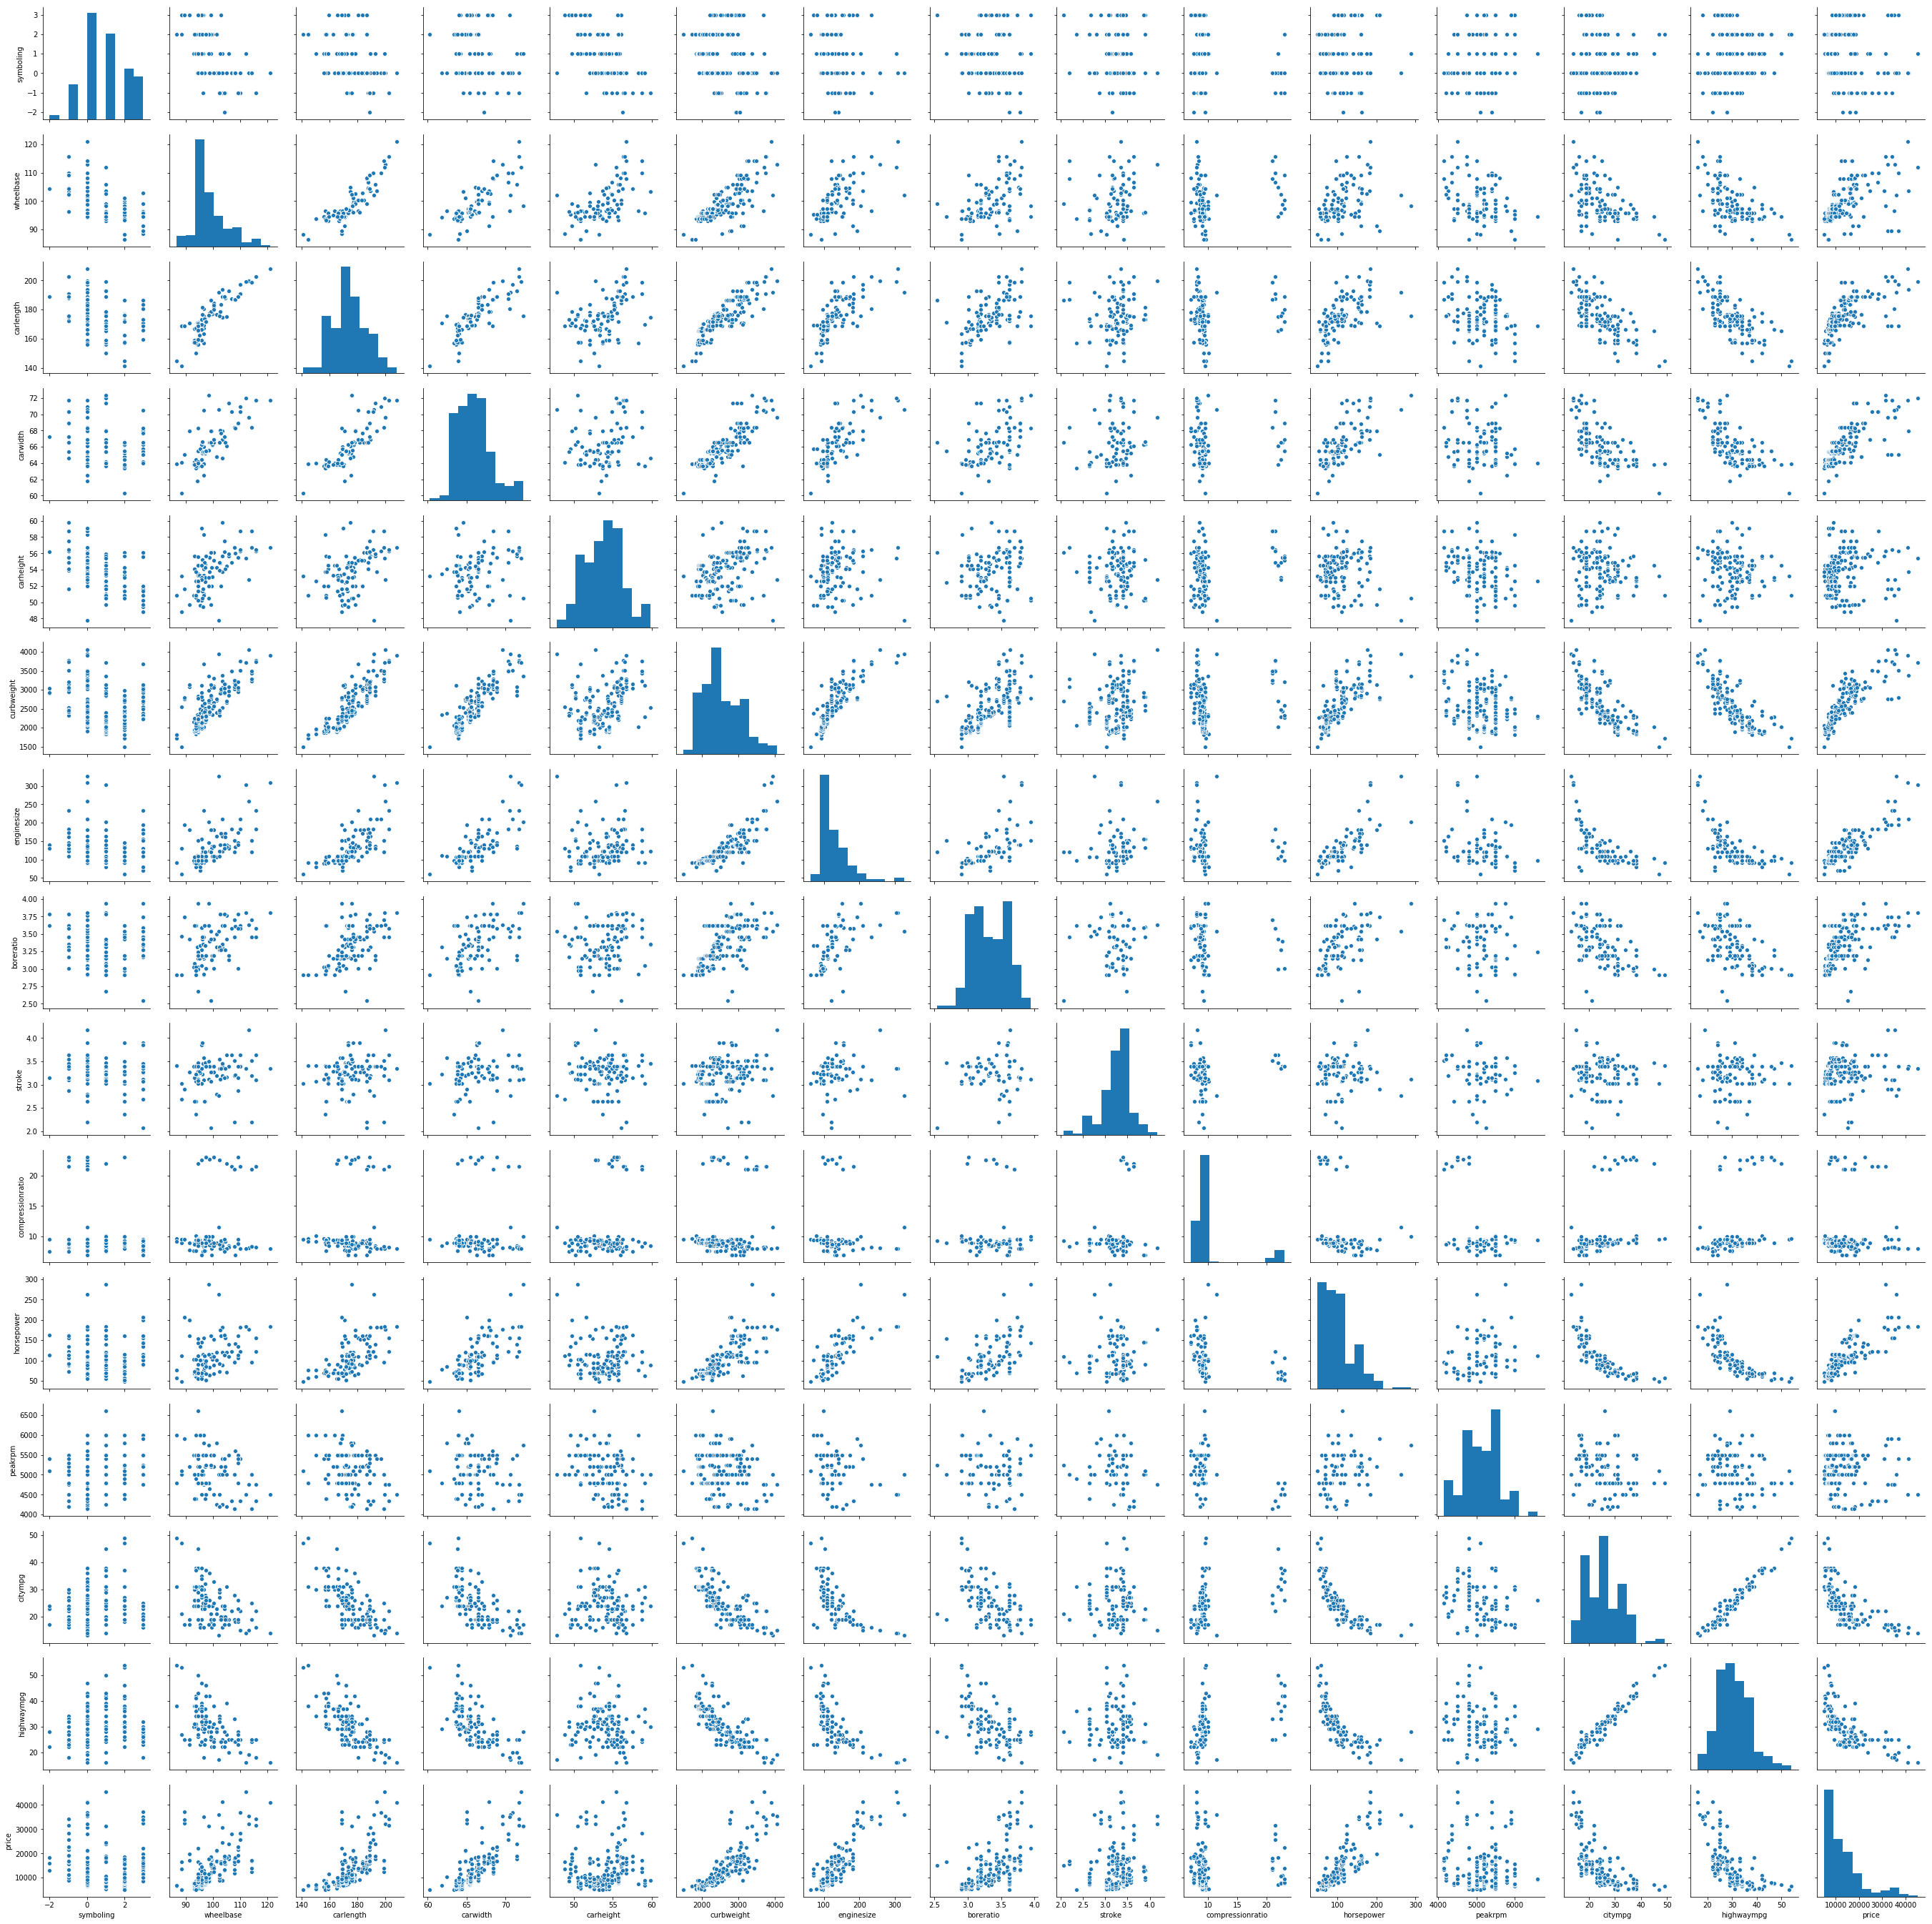

In [11]:
# Plotting graph for the numeric variable
sns.pairplot(df)

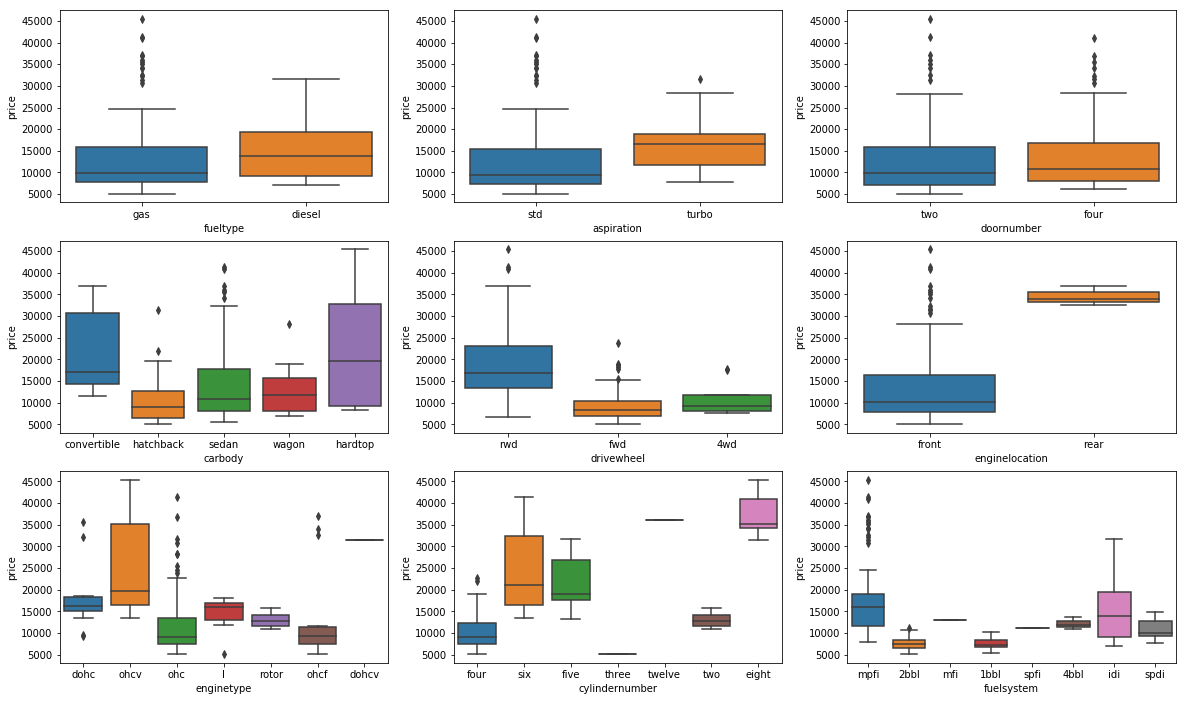

In [12]:
# Plotting the Graph for categorical value 
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype',y='price',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='aspiration',y='price',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='doornumber',y='price',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='carbody',y='price',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='enginelocation',y='price',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='enginetype',y='price',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='cylindernumber',y='price',data=df)
plt.subplot(3,3,9)
sns.boxplot(x='fuelsystem',y='price',data=df)


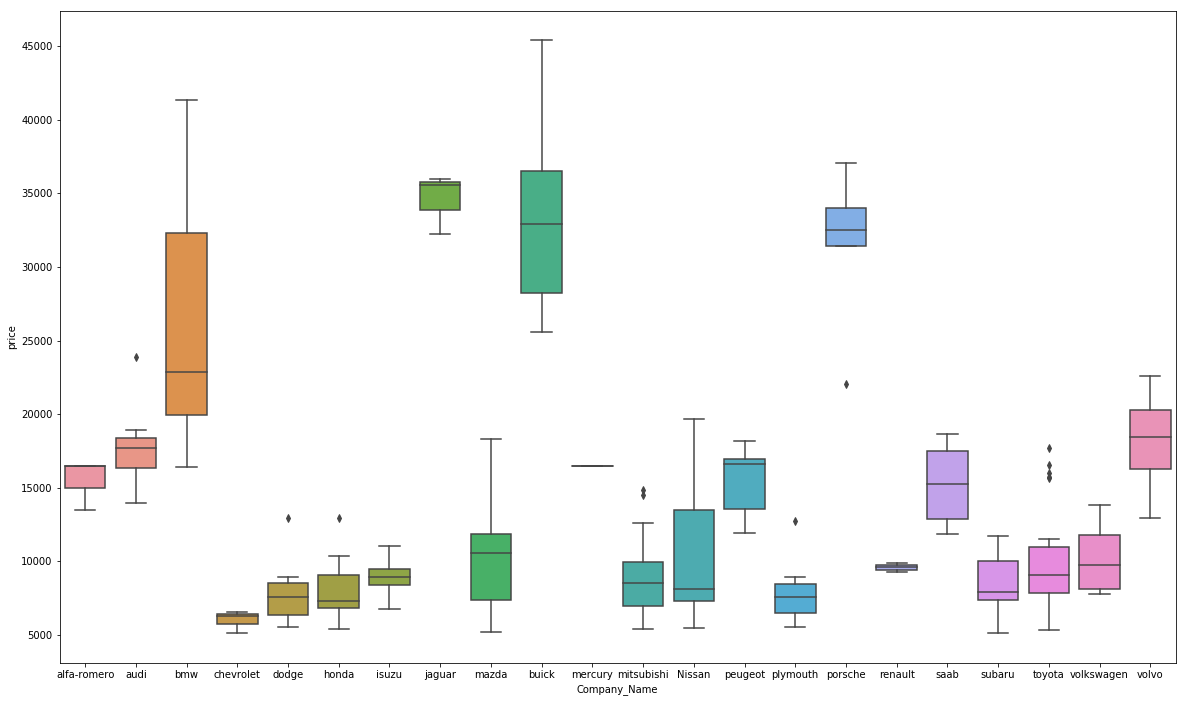

In [13]:
# Plotting the Graph for categorical value Company_Name
plt.figure(figsize=(20,12))
sns.boxplot(x='Company_Name',y='price',data=df)

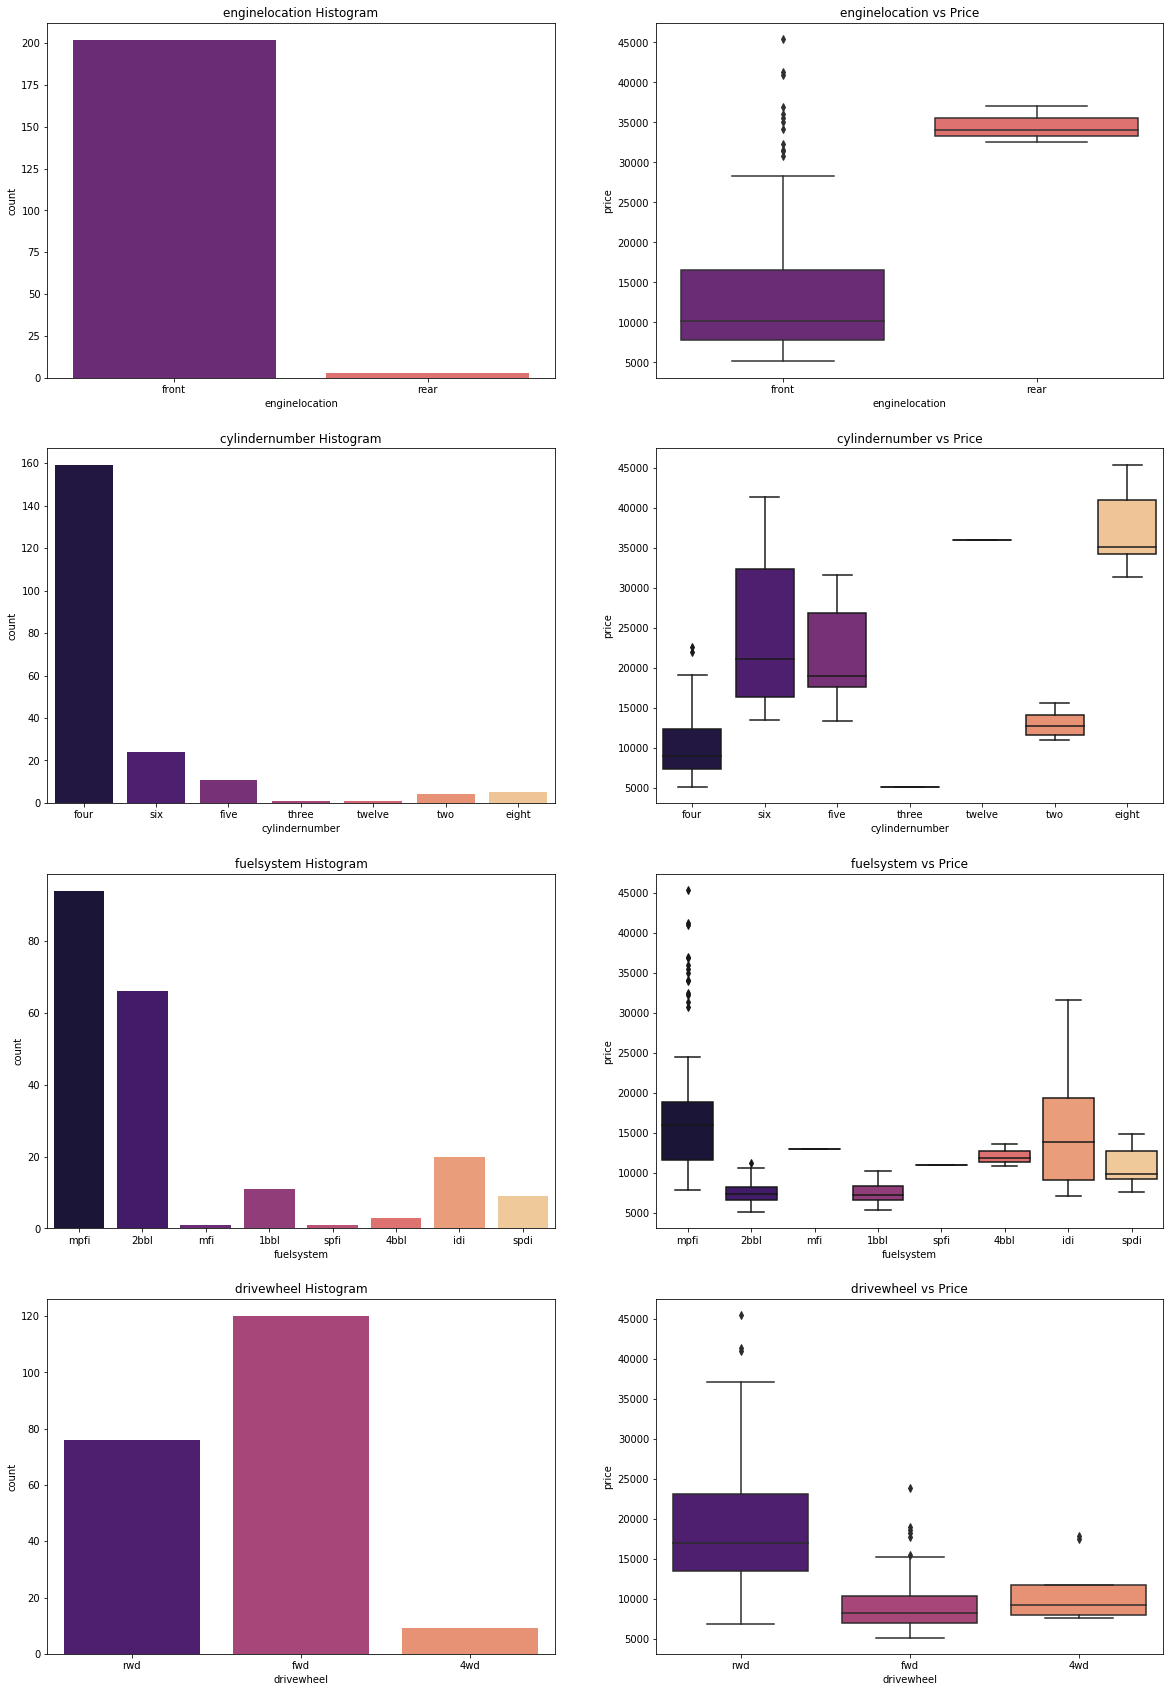

In [14]:
# Plotting Histogram and Boxplot analyse the categorical data
def plot_count(a,fig):
    plt.subplot(4,2,fig)
    plt.title(a+' Histogram')
    sns.countplot(df[a],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(a+' vs Price')
    sns.boxplot(x=df[a], y=df.price, palette=("magma"))
    
plt.figure(figsize=(20,30))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)



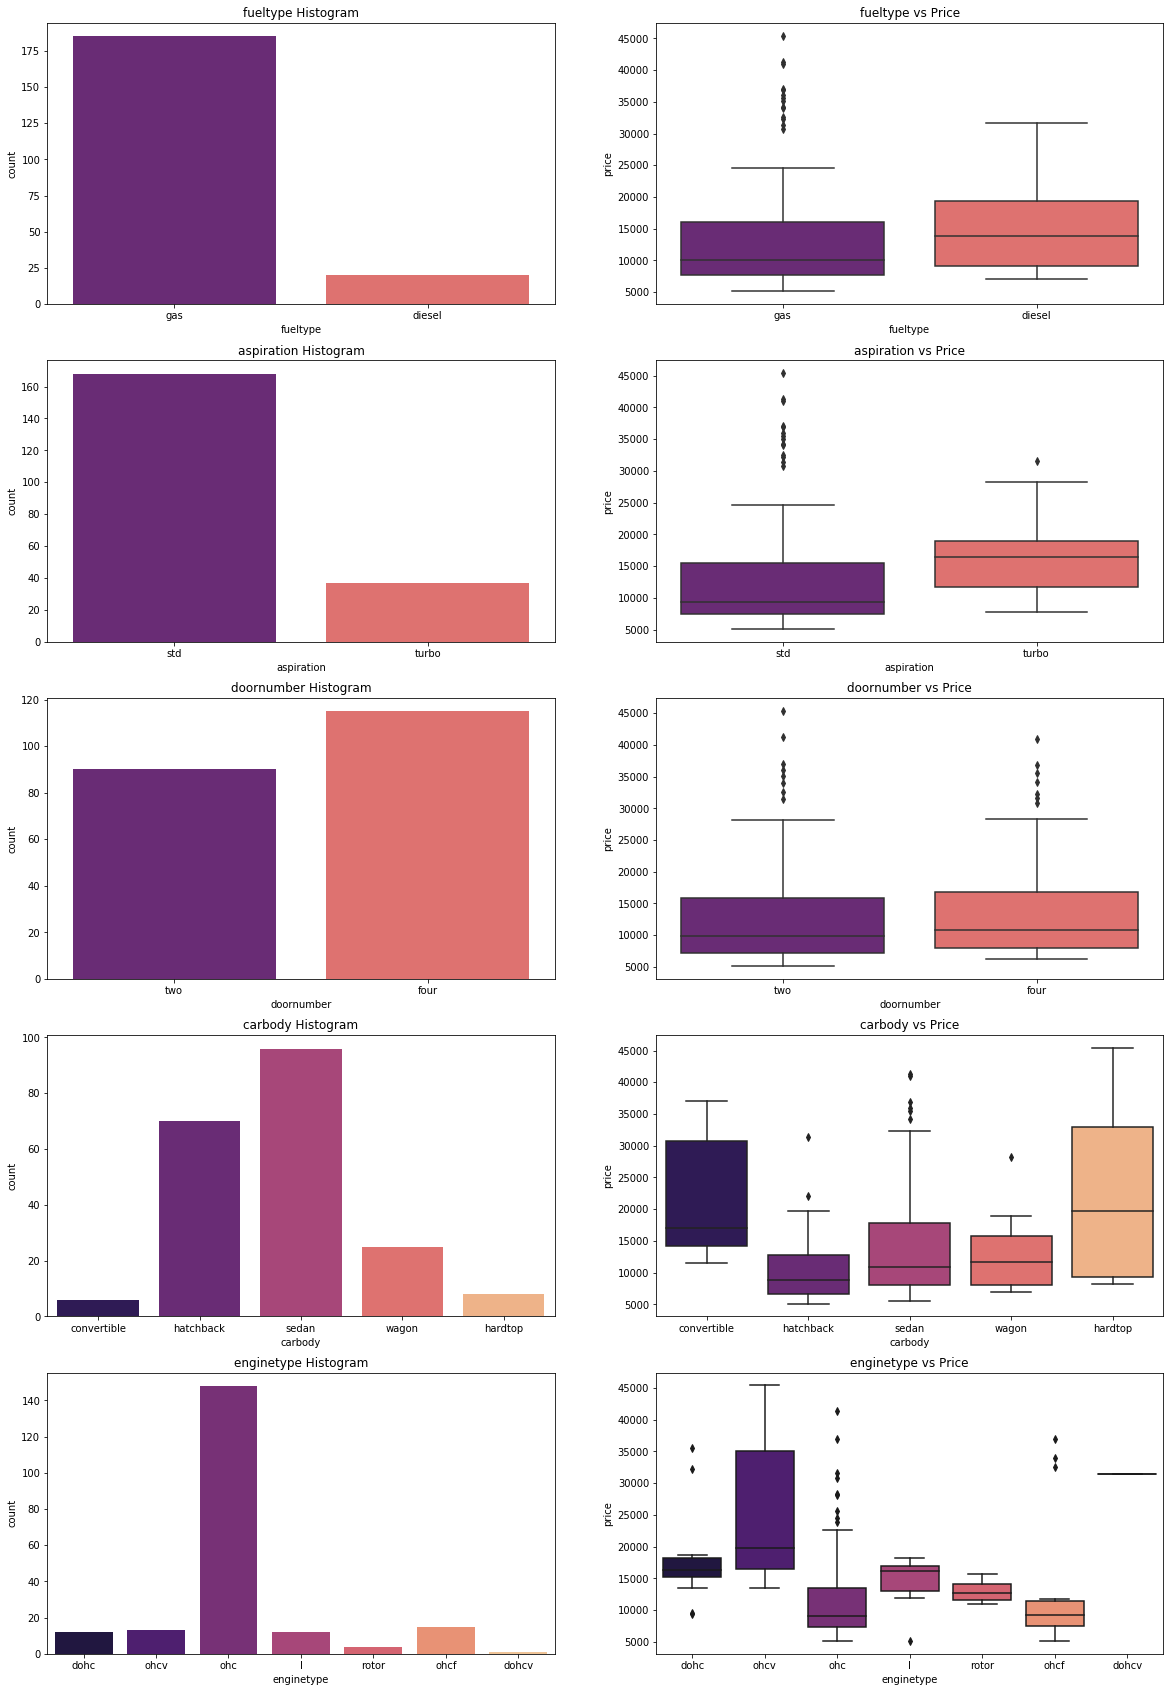

In [15]:
# Plotting Histogram and Boxplot analyse the categorical data
def plot_count(a,fig):
    plt.subplot(5,2,fig)
    plt.title(a+' Histogram')
    sns.countplot(df[a],palette=("magma"))
    plt.subplot(5,2,(fig+1))
    plt.title(a+' vs Price')
    sns.boxplot(x=df[a], y=df.price, palette=("magma"))
plt.figure(figsize=(20,30))
plot_count('fueltype', 1)
plot_count('aspiration', 3)
plot_count('doornumber', 5)
plot_count('carbody', 7)
plot_count('enginetype', 9)

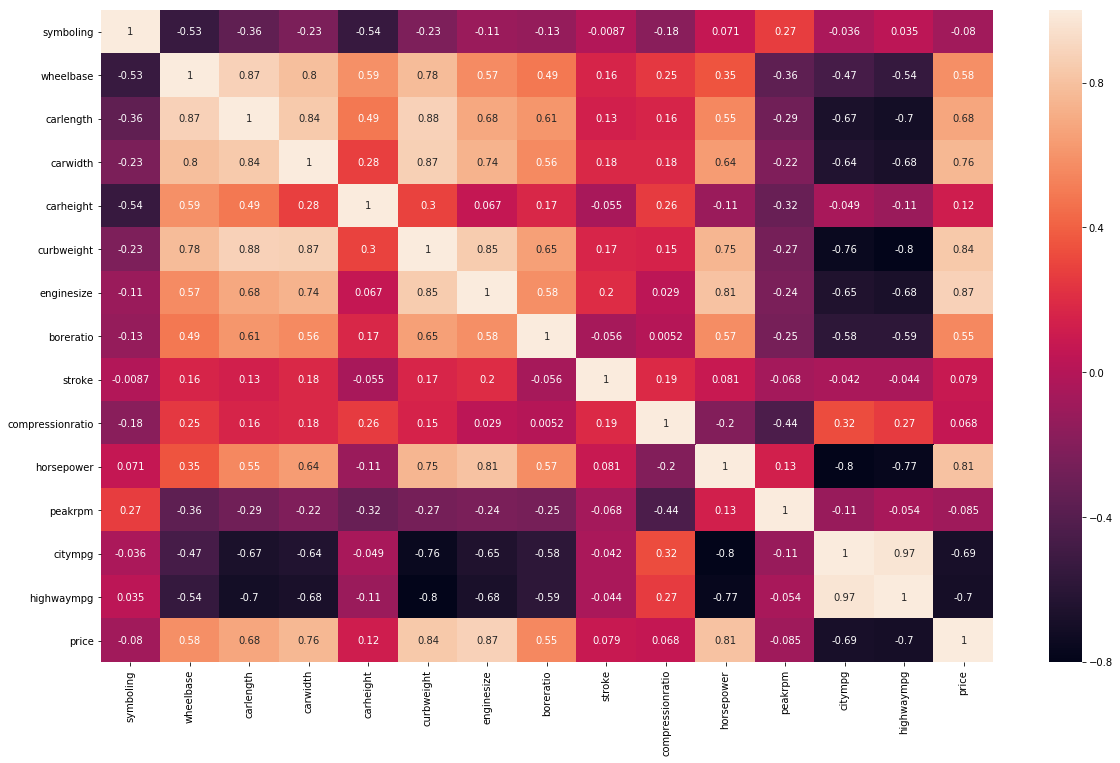

In [16]:
# Plotting the heatmap for the numerical data
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

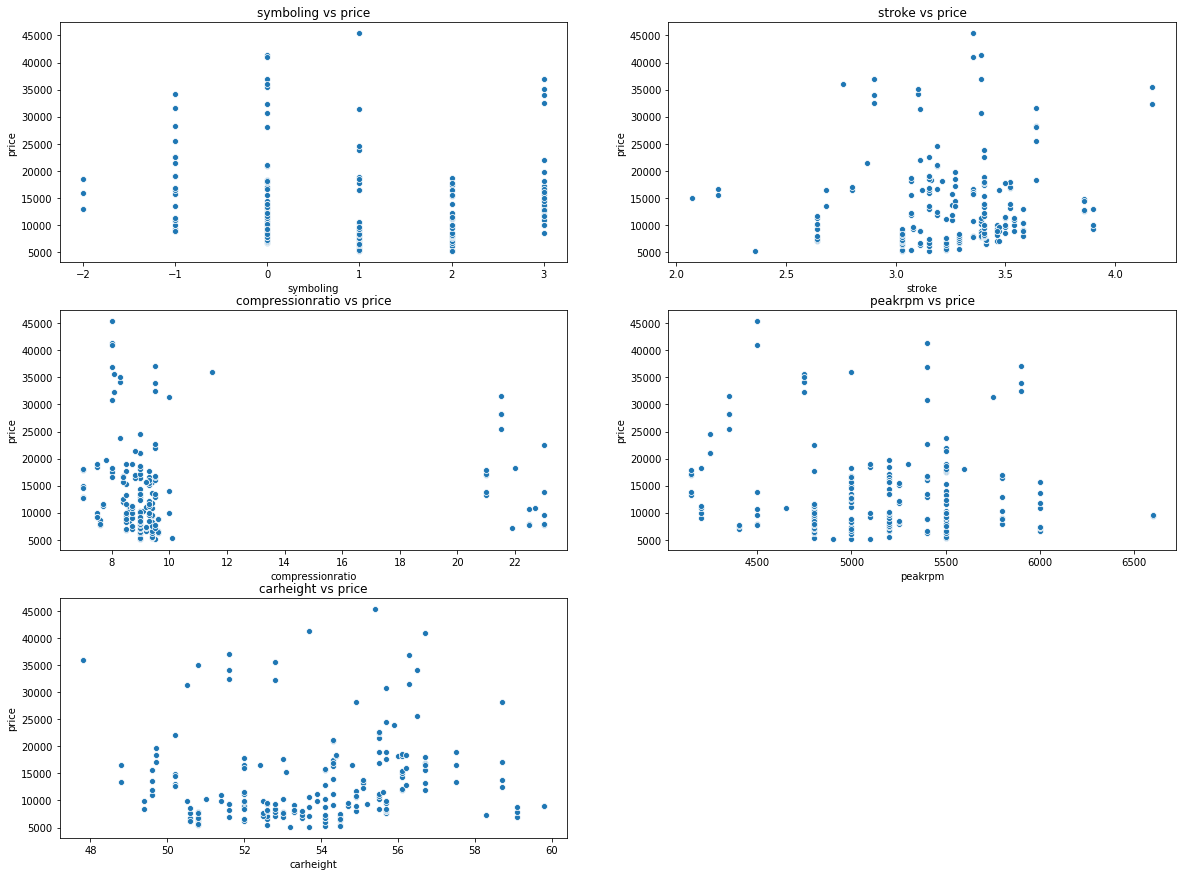

In [17]:
# Checking the numerical column which not support for linear regression
def remove_column(a,b):
    plt.subplot(3,2,b)
    sns.scatterplot(x=a, y='price', data=df)
    plt.title(a + ' vs price')
    
plt.figure(figsize=(20,15))

# symboling column is not properly distributed and with low correlation with price
remove_column('symboling',1)
# stroke column is not properly distributed and with low correlation with price
remove_column('stroke',2)
# compressionratio column is not properly distributed and with low correlation with price
remove_column('compressionratio',3)
# peakrpm column is not properly distributed and with low correlation with price
remove_column('peakrpm',4)
# carheight column is not properly distributed and with low correlation with price
remove_column('carheight',5)

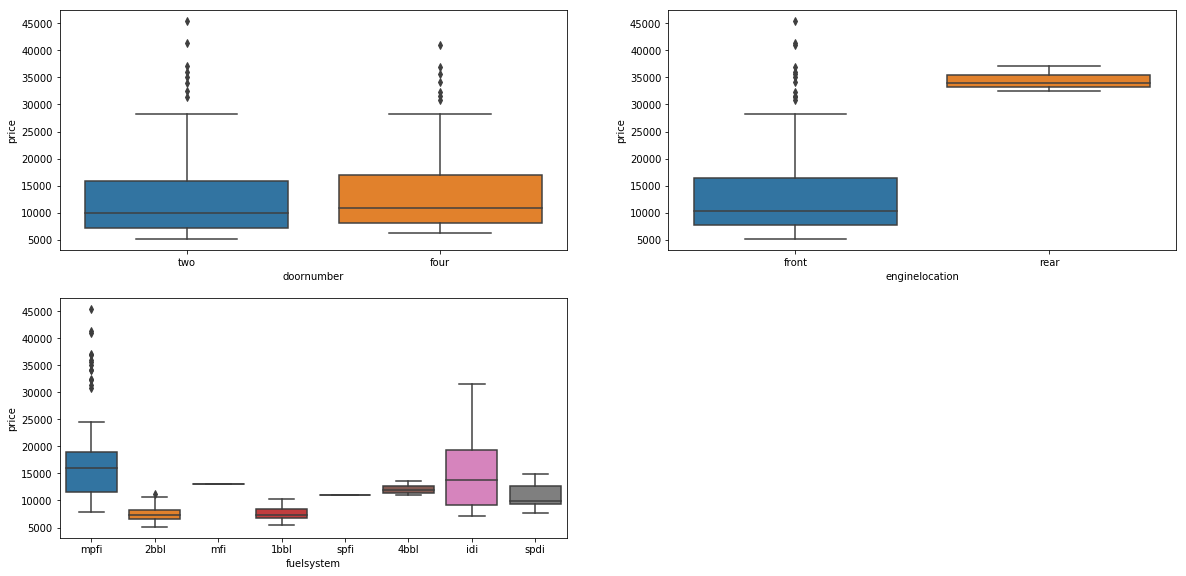

In [18]:
# Checking the categorical column which not support for linear regression
# there are no much difference between value of doornumber
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(x='doornumber',y='price',data=df)
# enginelocation maximum number of records are from front and very less form rear  
plt.subplot(3,2,2)
sns.boxplot(x='enginelocation',y='price',data=df)
# fuelsystem data is not distributed properly 
plt.subplot(3,2,3)
sns.boxplot(x='fuelsystem',y='price',data=df)

In [19]:
# Creating a new column Carsrange with 3 range Budget, Medium and Highend based on Company_Name and price
df['price'] = df['price'].astype('int')
df_1 = df
df_2 = df_1.groupby(['Company_Name'])['price'].mean()
df_1 = df_1.merge(df_2.reset_index(), how='left',on='Company_Name')
bins = [0,10000,20000,40000]
df_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(df_1['price_y'],bins,right=False,labels=df_bin)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,carsrange
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,Medium


In [20]:
print(df.enginelocation.value_counts())
print(df.fuelsystem.value_counts())
print(df.cylindernumber.value_counts())
print(df.drivewheel.value_counts())
print(df.fueltype.value_counts())
print(df.aspiration.value_counts())
print(df.carbody.value_counts())
print(df.enginetype.value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


In [21]:
# Dropping all not required column from the dataframe
not_required=['symboling','stroke','compressionratio','peakrpm','doornumber','carheight','enginelocation','Company_Name','fuelsystem']
df_New=df.drop(not_required,axis=1)

In [22]:
# Assigning the categorical value with 0 and 1 where we have only 2 categorical values
df_New[['fueltype']]=df_New[['fueltype']].apply(lambda x: x.map({'gas':1,'diesel':0}))
df_New[['aspiration']]=df_New[['aspiration']].apply(lambda x: x.map({'std':1,'turbo':0}))

In [23]:
df_New.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,carsrange
0,1,1,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495,Medium
1,1,1,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500,Medium
2,1,1,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500,Medium
3,1,1,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950,Medium
4,1,1,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450,Medium


In [24]:
# Creating dummies for those record which having more that 2 categorical value
df_dummies=pd.get_dummies(df_New[['cylindernumber','drivewheel','carbody','enginetype','carsrange']],drop_first=True)

In [25]:
# Merging Dummies and original data frame 
df_final=pd.concat([df_New,df_dummies],axis=1)

# Dropping column for which dummies was created
df_final=df_final.drop(['carbody','drivewheel','enginetype','cylindernumber','carsrange'],axis=1)


## Step 3:  Splitting the Data into Training and Testing Sets

In [26]:
# Splitting Train and Test data with 70 and 30 ratio
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
df_train.shape

(143, 32)

In [28]:
df_test.shape

(62, 32)

In [29]:
# Scalling the data for required column
scaler = MinMaxScaler()

Scale_column = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

df_train[Scale_column] = scaler.fit_transform(df_train[Scale_column])

C:\Users\BAJARANGI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
df_train.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,...,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,carsrange_Medium,carsrange_Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.344211,...,0.475524,0.132867,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.412587,0.118881
std,0.288490,0.387050,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.186165,...,0.501156,0.340624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


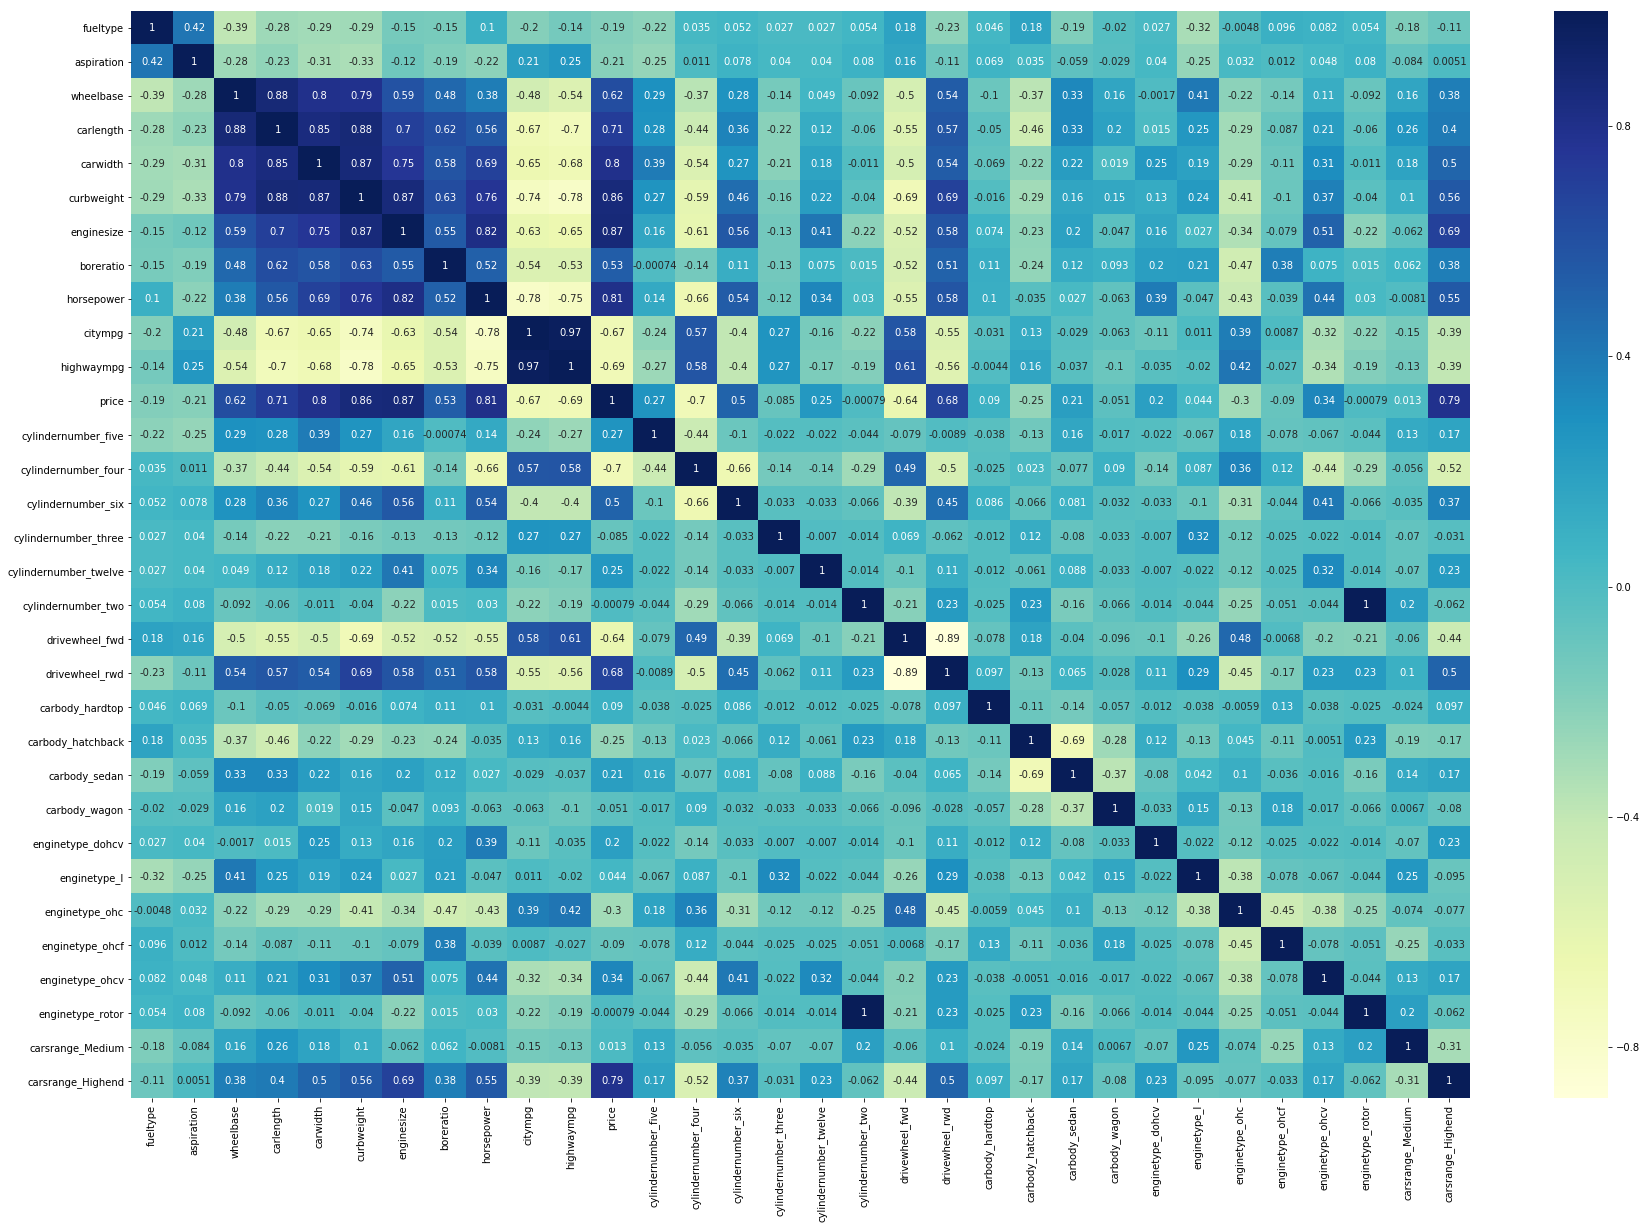

In [31]:
# Plotting the Heatmap for correlation
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

## Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

In [33]:
# First model
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                   -0.005128
fueltype                -0.019310
aspiration               0.007094
wheelbase                0.123600
carlength               -0.066506
carwidth                 0.210708
curbweight               0.284622
enginesize               0.054600
boreratio               -0.109051
horsepower               0.597230
citympg                 -0.019219
highwaympg               0.155907
cylindernumber_five     -0.129826
cylindernumber_four     -0.112161
cylindernumber_six      -0.089849
cylindernumber_three     0.065832
cylindernumber_twelve   -0.175657
cylindernumber_two      -0.004775
drivewheel_fwd          -0.020917
drivewheel_rwd           0.014145
carbody_hardtop         -0.102443
carbody_hatchback       -0.140871
carbody_sedan           -0.123198
carbody_wagon           -0.140972
enginetype_dohcv        -0.346647
enginetype_l            -0.007096
enginetype_ohc           0.073294
enginetype_ohcf          0.118086
enginetype_ohcv         -0.045294
enginetype_rot

In [34]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     70.04
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.58e-59
Time:                        19:23:10   Log-Likelihood:                 230.28
No. Observations:                 143   AIC:                            -398.6
Df Residuals:                     112   BIC:                            -306.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

## Function to check the VIF

In [35]:
def vifcheck(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [36]:
vifcheck(X_train)

,Features,VIF
16,cylindernumber_two,inf
28,enginetype_rotor,inf
10,highwaympg,196.22
5,curbweight,173.60
9,citympg,152.75
3,carlength,141.39
12,cylindernumber_four,138.92
6,enginesize,119.90
4,carwidth,87.99
8,horsepower,59.17


In [37]:
# Dropping insignificant variables - cylindernumber_two
X = X_train.drop('cylindernumber_two', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     70.04
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.58e-59
Time:                        19:23:10   Log-Likelihood:                 230.28
No. Observations:                 143   AIC:                            -398.6
Df Residuals:                     112   BIC:                            -306.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [38]:
# Dropping insignificant variables - cylindernumber_two
X = X.drop('citympg', 1,)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     73.09
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.01e-60
Time:                        19:23:10   Log-Likelihood:                 230.27
No. Observations:                 143   AIC:                            -400.5
Df Residuals:                     113   BIC:                            -311.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [39]:
# Dropping insignificant variables - enginesize
X = X.drop('enginesize', 1,)
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     76.31
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.55e-61
Time:                        19:23:11   Log-Likelihood:                 230.22
No. Observations:                 143   AIC:                            -402.4
Df Residuals:                     114   BIC:                            -316.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [40]:
# Dropping insignificant variables - aspiration
X = X.drop('aspiration', 1,)
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     79.68
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.36e-62
Time:                        19:23:11   Log-Likelihood:                 230.09
No. Observations:                 143   AIC:                            -404.2
Df Residuals:                     115   BIC:                            -321.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [41]:
# Dropping insignificant variables - fueltype
X = X.drop('fueltype', 1,)
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     83.29
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.27e-63
Time:                        19:23:11   Log-Likelihood:                 229.95
No. Observations:                 143   AIC:                            -405.9
Df Residuals:                     116   BIC:                            -325.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [42]:
# Dropping insignificant variables - drivewheel_fwd
X = X.drop('drivewheel_fwd', 1,)
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     87.03
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.88e-64
Time:                        19:23:11   Log-Likelihood:                 229.68
No. Observations:                 143   AIC:                            -407.4
Df Residuals:                     117   BIC:                            -330.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [43]:
# Dropping insignificant variables - carlength
X = X.drop('carlength', 1,)
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     90.89
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.85e-65
Time:                        19:23:12   Log-Likelihood:                 229.28
No. Observations:                 143   AIC:                            -408.6
Df Residuals:                     118   BIC:                            -334.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [44]:
# Dropping insignificant variables - wheelbase
X = X.drop('wheelbase', 1,)
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     94.04
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.57e-65
Time:                        19:23:12   Log-Likelihood:                 228.13
No. Observations:                 143   AIC:                            -408.3
Df Residuals:                     119   BIC:                            -337.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [45]:
# Dropping insignificant variables - cylindernumber_six
X = X.drop('cylindernumber_six', 1,)
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     97.06
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.37e-66
Time:                        19:23:12   Log-Likelihood:                 226.70
No. Observations:                 143   AIC:                            -407.4
Df Residuals:                     120   BIC:                            -339.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [46]:
# Dropping insignificant variables - cylindernumber_four
X = X.drop('cylindernumber_four', 1,)
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.18e-66
Time:                        19:23:12   Log-Likelihood:                 226.25
No. Observations:                 143   AIC:                            -408.5
Df Residuals:                     121   BIC:                            -343.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

In [47]:
# Dropping insignificant variables - enginetype_l
X = X.drop('enginetype_l', 1,)
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     107.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.20e-67
Time:                        19:23:13   Log-Likelihood:                 226.18
No. Observations:                 143   AIC:                            -410.4
Df Residuals:                     122   BIC:                            -348.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [48]:
# Dropping insignificant variables - enginetype_ohcv
X = X.drop('enginetype_ohcv', 1,)
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     113.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.43e-68
Time:                        19:23:13   Log-Likelihood:                 225.87
No. Observations:                 143   AIC:                            -411.7
Df Residuals:                     123   BIC:                            -352.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [49]:
# Dropping insignificant variables - cylindernumber_five
X = X.drop('cylindernumber_five', 1,)
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.76e-69
Time:                        19:23:13   Log-Likelihood:                 224.98
No. Observations:                 143   AIC:                            -412.0
Df Residuals:                     124   BIC:                            -355.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [50]:
# Dropping insignificant variables - cylindernumber_twelve
X = X.drop('cylindernumber_twelve', 1,)
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     124.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.25e-69
Time:                        19:23:13   Log-Likelihood:                 223.08
No. Observations:                 143   AIC:                            -410.2
Df Residuals:                     125   BIC:                            -356.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1383 

In [51]:
# Dropping insignificant variables - carbody_hardtop
X = X.drop('carbody_hardtop', 1,)
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.15e-70
Time:                        19:23:13   Log-Likelihood:                 221.28
No. Observations:                 143   AIC:                            -408.6
Df Residuals:                     126   BIC:                            -358.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1478 

In [52]:
# Dropping insignificant variables - highwaympg
X = X.drop('highwaympg', 1,)
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.93e-70
Time:                        19:23:14   Log-Likelihood:                 219.10
No. Observations:                 143   AIC:                            -406.2
Df Residuals:                     127   BIC:                            -358.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0759 

In [53]:
# Dropping insignificant variables - enginetype_rotor
X = X.drop('enginetype_rotor', 1,)
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()
print(lr_18.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.60e-71
Time:                        19:23:14   Log-Likelihood:                 217.96
No. Observations:                 143   AIC:                            -405.9
Df Residuals:                     128   BIC:                            -361.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0717 

In [54]:
# Dropping insignificant variables - curbweight
X = X.drop('curbweight', 1,)
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()
print(lr_19.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.40e-68
Time:                        19:23:14   Log-Likelihood:                 209.15
No. Observations:                 143   AIC:                            -390.3
Df Residuals:                     129   BIC:                            -348.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0606 

In [55]:
# Dropping insignificant variables - enginetype_ohc
X = X.drop('enginetype_ohc', 1,)
X_train_lm = sm.add_constant(X)

lr_20 = sm.OLS(y_train, X_train_lm).fit()
print(lr_20.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.59e-69
Time:                        19:23:14   Log-Likelihood:                 207.86
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     130   BIC:                            -351.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0298 

In [56]:
# Dropping insignificant variables - enginetype_ohcf
X = X.drop('enginetype_ohcf', 1,)
X_train_lm = sm.add_constant(X)

lr_21 = sm.OLS(y_train, X_train_lm).fit()
print(lr_21.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     158.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.29e-70
Time:                        19:23:14   Log-Likelihood:                 207.38
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     131   BIC:                            -355.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0308 

In [57]:
# Dropping insignificant variables - boreratio
X = X.drop('boreratio', 1,)
X_train_lm = sm.add_constant(X)

lr_22 = sm.OLS(y_train, X_train_lm).fit()
print(lr_22.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.28e-70
Time:                        19:23:14   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0490 

In [58]:
# Dropping insignificant variables - carwidth
X = X.drop('carwidth', 1,)
X_train_lm = sm.add_constant(X)

lr_23 = sm.OLS(y_train, X_train_lm).fit()
print(lr_23.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     116.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.24e-58
Time:                        19:23:15   Log-Likelihood:                 173.15
No. Observations:                 143   AIC:                            -326.3
Df Residuals:                     133   BIC:                            -296.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0014 

In [59]:
# Dropping insignificant variables - carbody_wagon
X = X.drop('carbody_wagon', 1,)
X_train_lm = sm.add_constant(X)

lr_24 = sm.OLS(y_train, X_train_lm).fit()
print(lr_24.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.04e-59
Time:                        19:23:15   Log-Likelihood:                 173.15
No. Observations:                 143   AIC:                            -328.3
Df Residuals:                     134   BIC:                            -301.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0014 

In [60]:
# Dropping insignificant variables - carbody_sedan
X = X.drop('carbody_sedan', 1,)
X_train_lm = sm.add_constant(X)

lr_25 = sm.OLS(y_train, X_train_lm).fit()
print(lr_25.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.52e-61
Time:                        19:23:15   Log-Likelihood:                 173.10
No. Observations:                 143   AIC:                            -330.2
Df Residuals:                     135   BIC:                            -306.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0051 

In [61]:
# Dropping insignificant variables - cylindernumber_three
X = X.drop('cylindernumber_three', 1,)
X_train_lm = sm.add_constant(X)

lr_26 = sm.OLS(y_train, X_train_lm).fit()
print(lr_26.summary())
print(vifcheck(X))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.97e-62
Time:                        19:23:15   Log-Likelihood:                 172.96
No. Observations:                 143   AIC:                            -331.9
Df Residuals:                     136   BIC:                            -311.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0058      0.01

## Step 5: Residual Analysis of the train data

In [62]:
y_train_price = lr_26.predict(X_train_lm)

Text(0.5, 0, 'Errors')

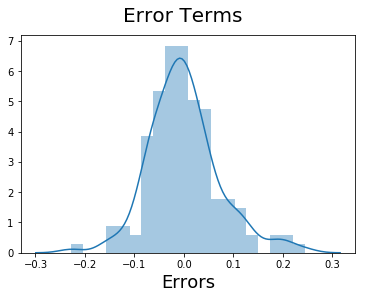

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

## Step 6: Making Predictions Using the Final Model

In [64]:
Scale_column_test = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio',
            'horsepower','citympg','highwaympg','price']

df_test[Scale_column_test] = scaler.transform(df_test[Scale_column_test])

In [65]:
df_test.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,...,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,carsrange_Medium,carsrange_Highend
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000
mean,0.887097,0.822581,0.437764,0.559481,0.480376,0.428470,0.265673,0.556580,0.248858,0.328405,...,0.451613,0.096774,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.435484,0.112903
std,0.319058,0.385142,0.212861,0.189947,0.165440,0.179488,0.162820,0.228484,0.163376,0.172009,...,0.501716,0.298064,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.499868,0.319058
min,0.000000,0.000000,0.000000,0.056911,0.183333,0.128394,0.067925,-0.111111,0.016667,0.027778,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.313793,0.459350,0.358333,0.305275,0.177358,0.404762,0.107292,0.166667,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.387931,0.547967,0.441667,0.406129,0.226415,0.563492,0.218750,0.305556,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,0.570690,0.719919,0.516667,0.564876,0.316038,0.746032,0.295833,0.444444,...,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,1.000000,1.000000,1.182759,1.089431,0.975000,0.935609,0.932075,0.888889,0.662500,0.694444,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


## Dividing into X_test and y_test

In [66]:
y_test = df_test.pop('price')
X_test = df_test

In [67]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [68]:
# Creating X_test_m dataframe by dropping variables from X_test_m

X_test_m = X_test_m.drop(['curbweight','enginetype_ohc','enginetype_ohcf','boreratio','carwidth','carbody_wagon',
                        'carlength','wheelbase','cylindernumber_six','cylindernumber_four','enginetype_l','enginetype_ohcv',
                          'cylindernumber_two','citympg','enginesize','aspiration','fueltype','drivewheel_fwd',
                          'cylindernumber_five','cylindernumber_twelve','carbody_hardtop','highwaympg','enginetype_rotor',
                          'carbody_sedan','cylindernumber_three'], axis = 1)

In [69]:
# Making predictions using the fourth model

y_pred_m = lr_26.predict(X_test_m)

## Step 7 Model Evaluation

Text(0, 0.5, 'y_pred')

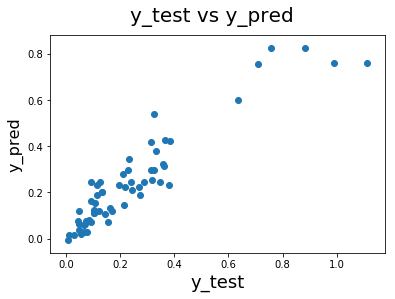

In [70]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

## r2_Score Calculation

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m)
r_squared = r2_score(y_test, y_pred_m)

### Mean_Squared_Error and r_square_value

In [72]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.006957896806917095
r_square_value : 0.8698198954269595


r_square_value of y_pred_m and y_test is 0.887 and 0.8698.
y_test having 98% match with the y_pred_m so the model fit is significant.

## Plotting graph between Actual and Predicted

Text(0, 0.5, 'Views')

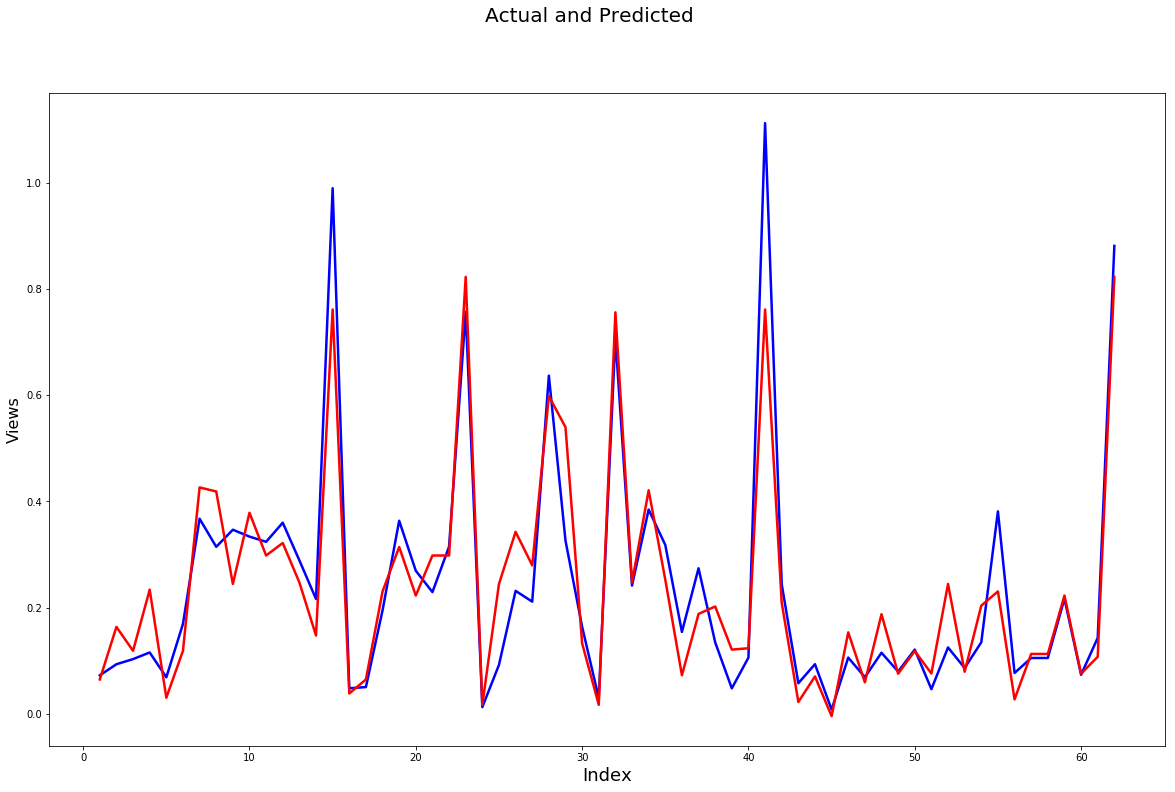

In [73]:
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(20,12))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)   

## Plotting Graph for Error terms

Text(0, 0.5, 'Views_show-Predicted_views')

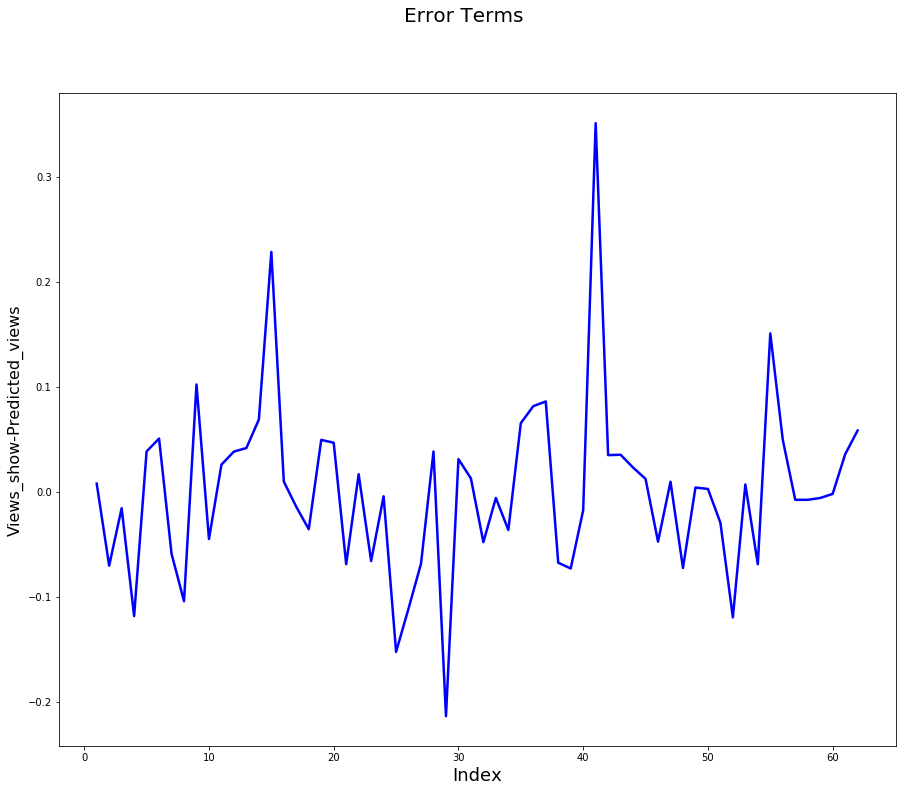

In [74]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,12))
plt.plot(c,y_test-y_pred_m, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views_show-Predicted_views', fontsize=16)

R-squared : 0.887
Adj. R-squared : 0.882
F-statistic : 178.2
Prob (F-statistic) : 6.97e-62
    
    
you can see that the F-statistic has a value of 178.2 which is a very high value and this, 
the Prob(F-statistic) is 6.97e-62 (as shown in the table) which is a practically zero value. 
Hence, the value of less than 0.05 which means that the overall model fit is significant.

## Equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒=0.6415×horsepower+0.0570×drivewheel_rwd-0.0424×carbody_hatchback
-0.2713×enginetype_dohcv+0.0590×carsrange_Medium+0.3354×carsrange_Highend+0.0058

## Using RFE Model

In [75]:
# Selecting column to create RFE model
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [76]:
# Finding the list of column and their rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 18),
 ('aspiration', False, 21),
 ('wheelbase', False, 2),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', True, 1),
 ('cylindernumber_five', False, 6),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 13),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 20),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 16),
 ('carbody_hardtop', False, 3),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 19),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 9),
 ('enginetype_rotor', False, 22),
 ('carsrange_Medium', False, 12),
 ('carsrange_Highend', True, 1)]

In [77]:
# Selecting required column where rank was 1
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'horsepower', 'highwaympg',
       'cylindernumber_twelve', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'carsrange_Highend'],
      dtype='object')

In [78]:
# Data check
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,horsepower,highwaympg,cylindernumber_twelve,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,carsrange_Highend
122,0.291667,0.272692,0.083333,0.567568,0,0,1,0,0,0
125,0.666667,0.500388,0.395833,0.270270,0,1,0,0,0,1
166,0.308333,0.314973,0.266667,0.324324,0,1,0,0,0,0
1,0.316667,0.411171,0.262500,0.270270,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0.135135,0,0,0,1,0,0


In [79]:
# Funtion to build model and VIF check
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [80]:
# Creating the model and summary for that
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     171.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.58e-70
Time:                        19:23:21   Log-Likelihood:                 205.62
No. Observations:                 143   AIC:                            -389.2
Df Residuals:                     132   BIC:                            -356.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [81]:
# Drpping cylindernumber_twelve
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [82]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.73e-71
Time:                        19:23:21   Log-Likelihood:                 204.05
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     133   BIC:                            -358.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0758      0.04

In [83]:
# Drpping highwaympg
X_train_new = X_train_new.drop(["highwaympg"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.85e-72
Time:                        19:23:21   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0305      0.02

In [84]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
2,curbweight,8.10
5,carbody_sedan,6.07
4,carbody_hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
6,carbody_wagon,3.58
8,carsrange_Highend,1.63
7,enginetype_dohcv,1.46


In [85]:
# Drpping curbweight
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.70e-70
Time:                        19:23:21   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0319      0.02

,Features,VIF
0,const,26.89
4,carbody_sedan,6.06
3,carbody_hatchback,5.54
5,carbody_wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
7,carsrange_Highend,1.56
6,enginetype_dohcv,1.21


In [86]:
# Drpping carbody_sedan
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.68e-69
Time:                        19:23:21   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0934      0.01

,Features,VIF
0,const,10.82
2,horsepower,2.39
1,carwidth,2.09
6,carsrange_Highend,1.55
3,carbody_hatchback,1.23
5,enginetype_dohcv,1.21
4,carbody_wagon,1.11


In [87]:
# Drpping carbody_wagon
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.57e-70
Time:                        19:23:21   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
5,carsrange_Highend,1.53
4,enginetype_dohcv,1.21
3,carbody_hatchback,1.13


In [88]:
# Fitting the model
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

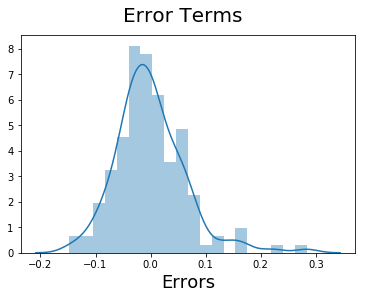

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

In [90]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [91]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:
# Making predictions
y_pred = lm.predict(X_test_new)

## r2_score

In [93]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8917074860750196

Text(0, 0.5, 'y_pred')

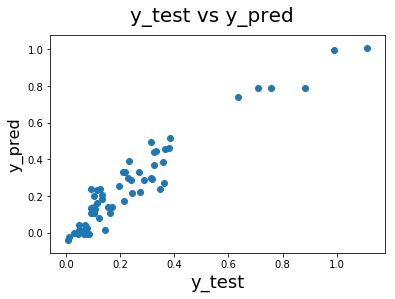

In [94]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Text(0, 0.5, 'Views')

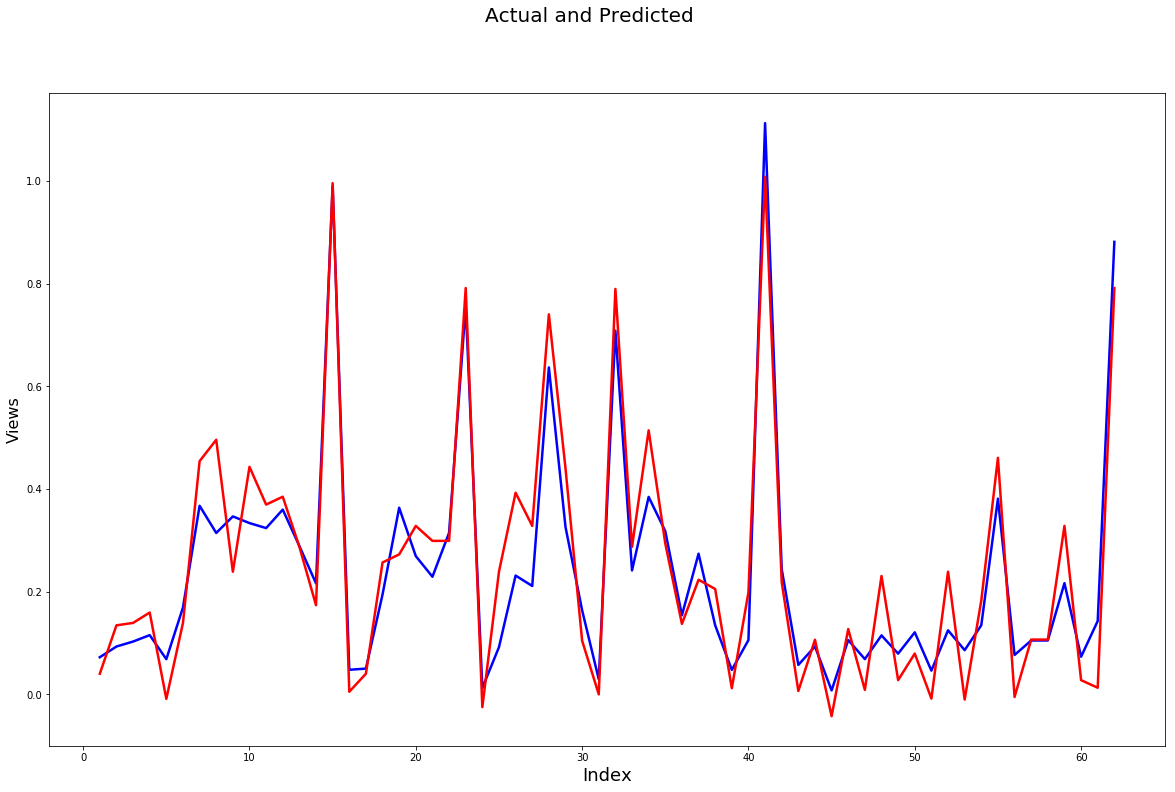

In [95]:
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(20,12))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)  

Text(0, 0.5, 'Views_show-Predicted_views')

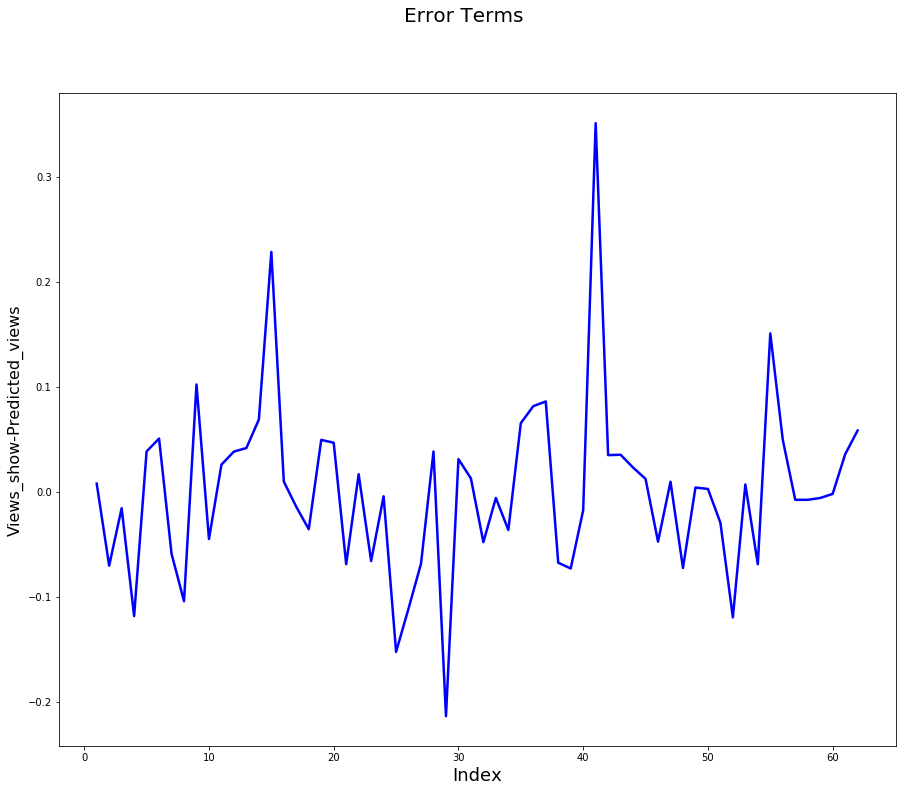

In [96]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,12))
plt.plot(c,y_test-y_pred_m, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views_show-Predicted_views', fontsize=16)

R-squared : 0.912
Adj. R-squared : 0.909
F-statistic : 284.8
Prob (F-statistic) : 1.57e-70
         
    
We can see that the F-statistic has a value of 284.8 which is a very high value and this, 
the Prob(F-statistic) is 1.57e-70 (as shown in the table) which is a practically zero value. 
Hence, the value of less than 0.05 which means that the overall model fit is significant.


r_square_value of y_pred_m and y_test is 0.912 and 0.8917.
y_test having 98% match with the y_pred_m so the model fit is significant.

### Equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒=0.3952×carwidth+0.5013×horsepower-0.0336×ccarbody_hatchback
-0.3231×enginetype_dohcv+0.2833×carsrange_Highend-0.0970